# Basic perceptron

# Import library
The required libraries are imported, including Torch for model creation and training, TorchVision for data loading, Matplotlib for result visualization, and torch.nn modules for defining the model.

In [4]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Data augmentation

Hyperparameters such as input size, output size, learning rate, number of epochs, and batch size are defined.

Data transformations to apply to the data are defined using the transforms.Compose class. For training data, data augmentation is applied with random horizontal flipping and random cropping. For test data, only the transformation to a tensor is applied.

In [5]:
# Hyperparameters
input_size = 32 * 32 * 3
output_size = 100
learning_rate = 0.001
num_epochs = 40
batch_size = 64

# Define data augmentation transformations
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
])



# Load data set

The CIFAR-100 datasets are loaded using the defined transformations. Training data undergoes data augmentation, while test data is loaded without augmentation.

Data loaders (DataLoader) are created for training and testing. They handle batch loading of data and can shuffle data if needed.

In [6]:
# Load datasets with data augmentation for training and normal transform for testing
train_dataset = datasets.CIFAR100(
    root='data',
    train=True,
    transform=train_transform,
    download=True
)
test_dataset = datasets.CIFAR100(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



Files already downloaded and verified
Files already downloaded and verified


# Perceptron definition
A perceptron model is defined using the nn.Module class. The model contains a single linear layer (nn.Linear) that performs the linear transformation of input data.



In [7]:
# Basic Perceptron definition
class Perceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input into a vector
        x = self.fc(x)
        return x

# Create the perceptron model
perceptron_model = Perceptron(input_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(perceptron_model.parameters(), lr=learning_rate)

# Training and evaluation
The train function takes the model, data loader, loss function, and optimizer as input. It sets the model to training mode, calculates the loss, performs backpropagation, updates model weights, and calculates accuracy during training.

The evaluate function evaluates the model on test data. It sets the model to evaluation mode, calculates loss and accuracy on test data, but without performing backpropagation.

The model is trained by looping over the specified number of epochs. For each epoch, the model is trained using the train function and evaluated using the evaluate function. Losses and accuracies are recorded at each epoch

In [8]:

# Training function
def train(model, dataloader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    avg_loss = total_loss / len(dataloader)
    return avg_loss, accuracy

# Evaluation function
def evaluate(model, dataloader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    avg_loss = total_loss / len(dataloader)
    return avg_loss, accuracy

# Training of the perceptron model
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(perceptron_model, train_loader, criterion, optimizer)
    test_loss, test_accuracy = evaluate(perceptron_model, test_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/40], Train Loss: 4.4399, Train Accuracy: 6.18%, Test Loss: 4.2928, Test Accuracy: 9.40%
Epoch [2/40], Train Loss: 4.2967, Train Accuracy: 8.18%, Test Loss: 4.1979, Test Accuracy: 9.82%
Epoch [3/40], Train Loss: 4.2793, Train Accuracy: 8.94%, Test Loss: 4.2417, Test Accuracy: 10.15%
Epoch [4/40], Train Loss: 4.2525, Train Accuracy: 8.96%, Test Loss: 4.2901, Test Accuracy: 10.70%
Epoch [5/40], Train Loss: 4.2480, Train Accuracy: 9.12%, Test Loss: 4.3728, Test Accuracy: 9.58%
Epoch [6/40], Train Loss: 4.2195, Train Accuracy: 9.38%, Test Loss: 4.1792, Test Accuracy: 11.55%
Epoch [7/40], Train Loss: 4.2371, Train Accuracy: 9.48%, Test Loss: 4.0663, Test Accuracy: 12.17%
Epoch [8/40], Train Loss: 4.2296, Train Accuracy: 9.49%, Test Loss: 4.1695, Test Accuracy: 10.00%
Epoch [9/40], Train Loss: 4.2271, Train Accuracy: 9.68%, Test Loss: 4.1450, Test Accuracy: 11.36%
Epoch [10/40], Train Loss: 4.2169, Train Accuracy: 9.76%, Test Loss: 4.1337, Test Accuracy: 12.23%
Epoch [11/40], Train L

# Visualization of Performance Curves

Loss and accuracy curves are plotted using Matplotlib to visualize the training and testing performance over epochs.


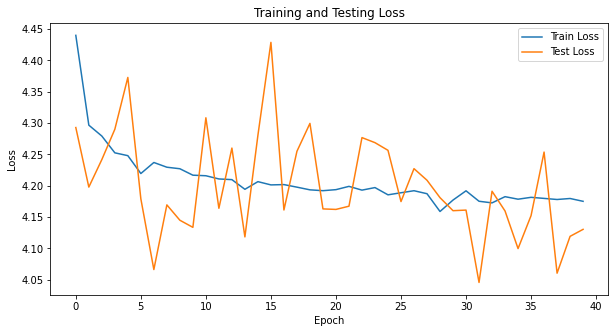

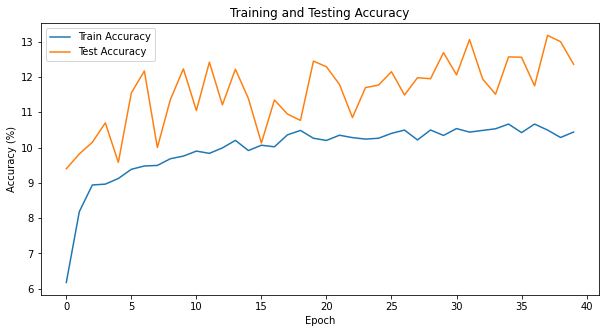

In [9]:
# Plotting performance curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Testing Accuracy')
plt.show()

# Interpretation:

In this case the model has a very low accuracy. We can see that the testing curve does not generalize very well with the model, besides even if the lost curve tend to decrease, it remains high and, testing does not fit well with the trained model.

The model is also very "noisy" which typically refers to a model that exhibits erratic or unpredictable behavior in terms of its training and validation performance. 

At this stage of the project, we may suggest an ineffective use of regularization techniques, such as L2 regularization or dropout, which can result in overfitting, causing the model to fit noise in the training data.

A more complex model should perform better.